### This script file is used to analysis Smarket.csv dataset.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [27]:
df = pd.read_csv('data/Smarket.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1250 entries, 0 to 1249
Data columns (total 9 columns):
Year         1250 non-null int64
Lag1         1250 non-null float64
Lag2         1250 non-null float64
Lag3         1250 non-null float64
Lag4         1250 non-null float64
Lag5         1250 non-null float64
Volume       1250 non-null float64
Today        1250 non-null float64
Direction    1250 non-null object
dtypes: float64(7), int64(1), object(1)
memory usage: 88.0+ KB


<b>(a) Produce some numerical and graphical summaries of data. Do there appear to be any patterns?</b>

In [28]:
description = df.describe()
print(description)

              Year         Lag1         Lag2         Lag3         Lag4  \
count  1250.000000  1250.000000  1250.000000  1250.000000  1250.000000   
mean   2003.016000     0.003834     0.003919     0.001716     0.001636   
std       1.409018     1.136299     1.136280     1.138703     1.138774   
min    2001.000000    -4.922000    -4.922000    -4.922000    -4.922000   
25%    2002.000000    -0.639500    -0.639500    -0.640000    -0.640000   
50%    2003.000000     0.039000     0.039000     0.038500     0.038500   
75%    2004.000000     0.596750     0.596750     0.596750     0.596750   
max    2005.000000     5.733000     5.733000     5.733000     5.733000   

             Lag5       Volume        Today  
count  1250.00000  1250.000000  1250.000000  
mean      0.00561     1.478305     0.003138  
std       1.14755     0.360357     1.136334  
min      -4.92200     0.356070    -4.922000  
25%      -0.64000     1.257400    -0.639500  
50%       0.03850     1.422950     0.038500  
75%       0

This data frame with 1250 observations on the following 9 variables.

    Year: The year that the observation was recorded
    Lag1: Percentage return for previous day
    Lag2: Percentage return for 2 days previous
    Lag3: Percentage return for 3 days previous
    Lag4: Percentage return for 4 days previous
    Lag5: Percentage return for 5 days previous
    Volume: Volume of shares traded (number of daily shares traded in billions)
    Today: Percentage return for today
    Direction: A factor with levels Down and Up indicating whether the market had a positive or negative return on a given day

In [29]:
df.shape

(1250, 9)

In [30]:
# Correlations
df.corr()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,0.029700,0.030596,0.033195,0.035689,0.029788,0.539006,0.030095
Lag1,0.029700,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,0.030596,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,0.033195,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,0.035689,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,0.029788,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.539006,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,0.030095,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


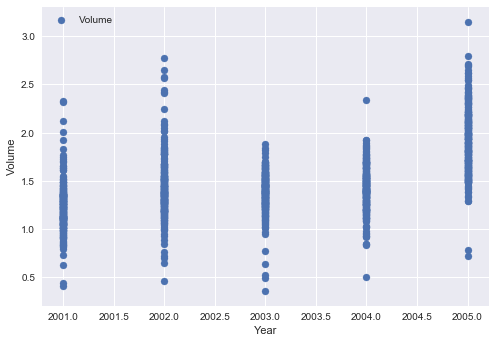

In [31]:
#plot Volumen vs Year
figv, axv = plt.subplots()
axv.scatter(df['Year'], df['Volume'])
axv.set_xlabel('Year')
axv.set_ylabel('Volume')
axv.legend()
plt.show()

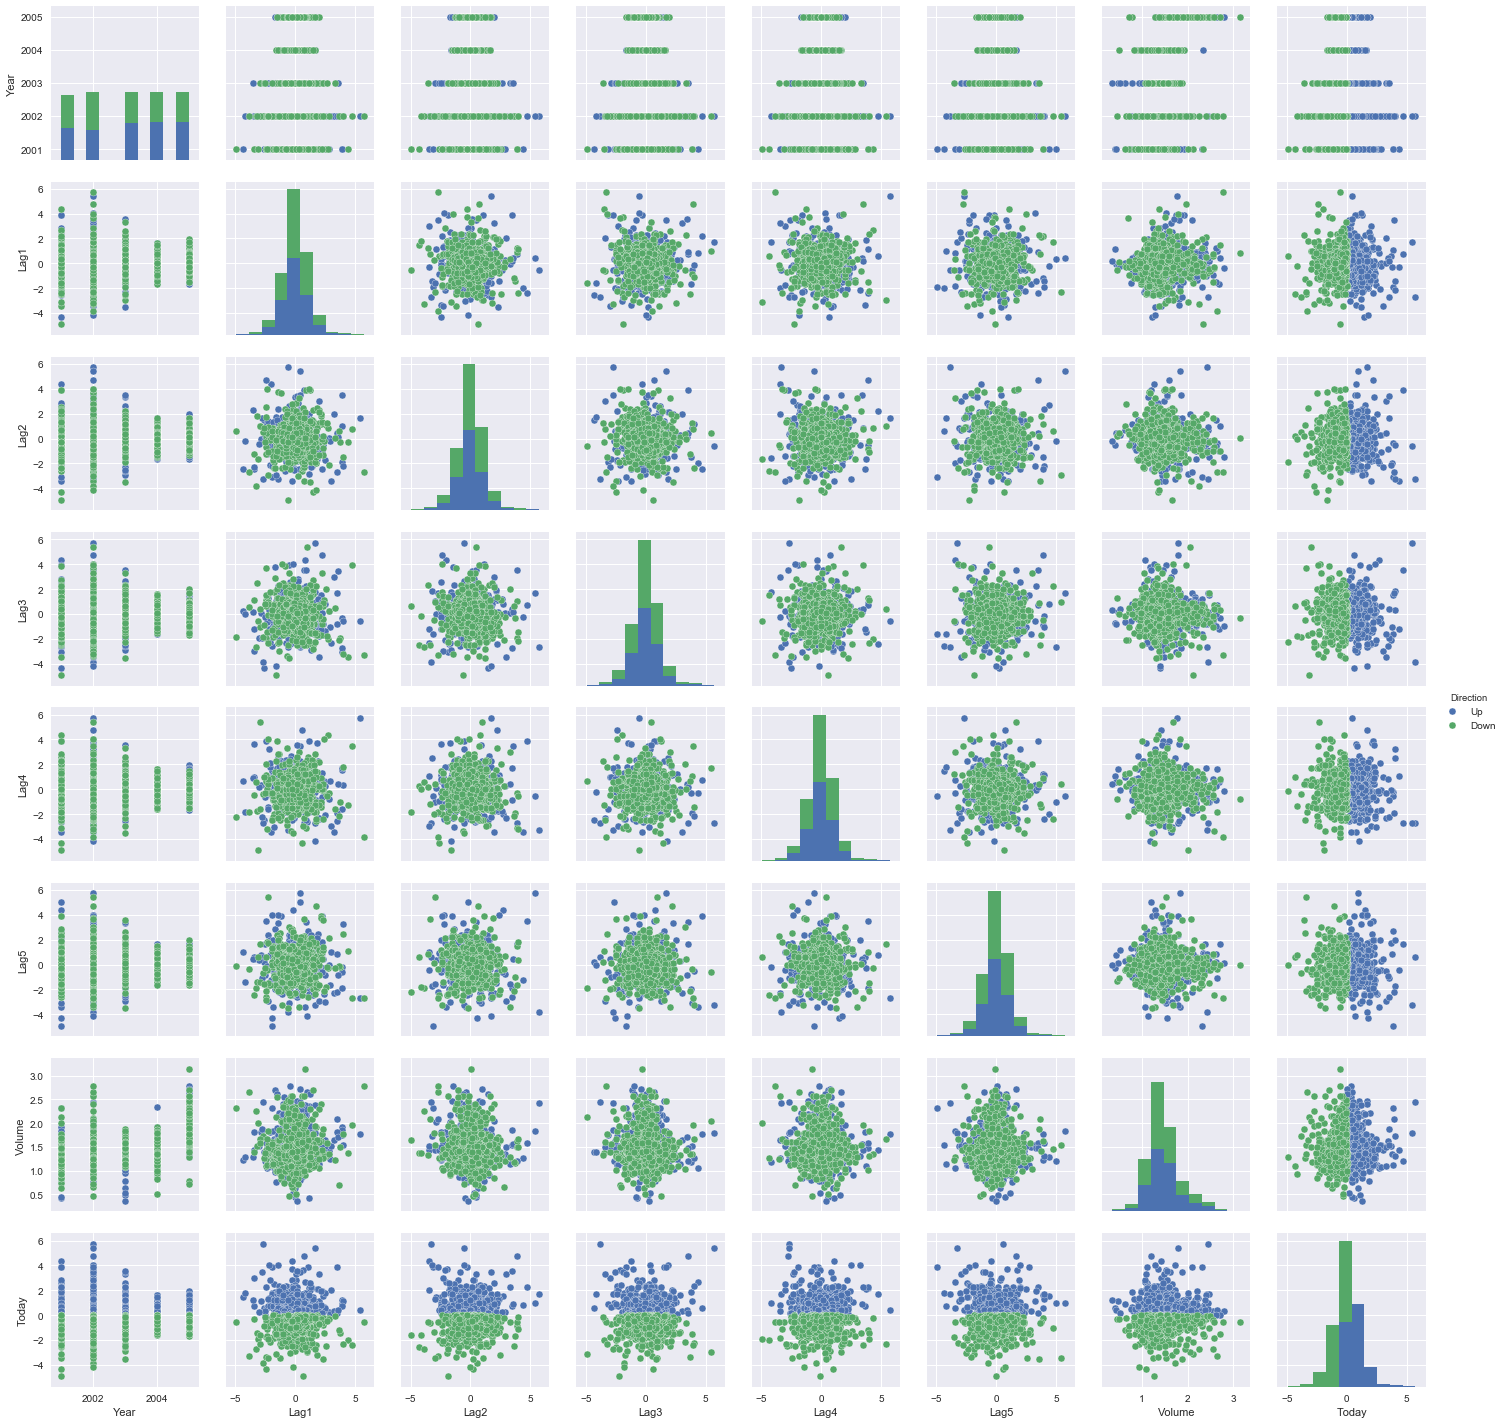

In [32]:
#Pair plot matrix
sns.set()
sns.pairplot(df, hue='Direction')
plt.show()

<b>(b) Use the full data set to perform a logistic regression with Direction as the response and the five lag variables plus Volume as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?</b>

In [38]:
## Logistic regression with statsmodels
predictors = list(df.columns)
predictors.remove('Direction')
predictors.remove('Year')
predictors.remove('Today')
lr_form = 'Direction~' + '+'.join(predictors)
logreg = smf.glm(formula=lr_form, data=df, family=sm.families.Binomial()).fit()

logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                          Generalized Linear Model Regression Results                           
================================================================================================
Dep. Variable:     ['Direction[Down]', 'Direction[Up]']   No. Observations:                 1250
Model:                                              GLM   Df Residuals:                     1243
Model Family:                                  Binomial   Df Model:                            6
Link Function:                                    logit   Scale:                             1.0
Method:                                            IRLS   Log-Likelihood:                -863.79
Date:                                  Mon, 23 Oct 2017   Deviance:                       1727.6
Time:                                          19:43:31   Pearson chi2:                 1.25e+03
No. Iterations:                                       4                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1260      0.241      0.523      0.601      -0.346       0.598
Lag1           0.0731      0.050      1.457      0.145      -0.025       0.171
Lag2           0.0423      0.050      0.845      0.398      -0.056       0.140
Lag3          -0.0111      0.050     -0.222      0.824      -0.109       0.087
Lag4          -0.0094      0.050     -0.187      0.851      -0.107       0.089
Lag5          -0.0103      0.050     -0.208      0.835      -0.107       0.087
Volume        -0.1354      0.158     -0.855      0.392      -0.446       0.175
==============================================================================
"""

<b>(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.</b>

<b>(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with Lag2 as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).</b>

<b>(e) Use Forward Stepwise Selection approach for feature selection. In each step, choose the best model using the highest AUC. Report the features, confusion matrix, and AUC that appears to provide the best results on the held out data.</b>